# Potencial electrostático y campo eléctrico de un dipolo puntual
En este notebook graficamos el potencial electrostático generado por un dipolo puntual, usando las expresiones que se obtienen del desarrollo multipolar del potencial en términos de los armónicos esféricos. Recuerden que cada celda a continuación debe ejecutarse en orden, apretando SHIFT+ENTER:

In [1]:
# Importamos NumPy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *

In [2]:
# Definimos el valor del momento dipolar
q10 = 1.                     # Momento multipolar (1,0)
p   = np.sqrt(4*np.pi/3)*q10 # P_z

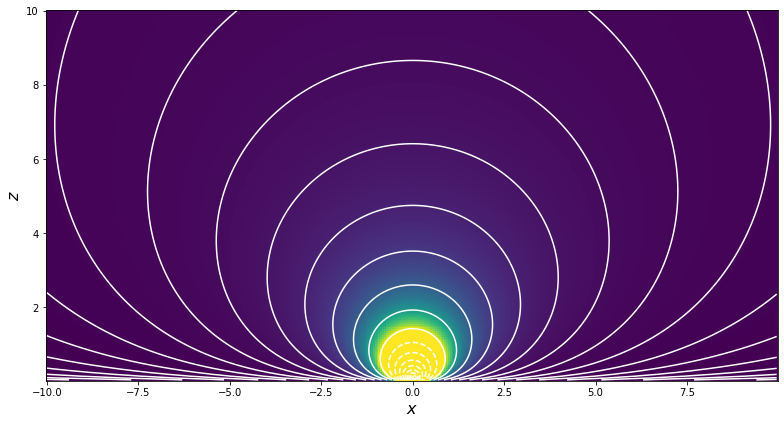

In [3]:
# Graficamos el valor del potencial y las curvas equipotenciales en el plano (x,z)
xv = np.arange(-10,10,.05)   # generamos un vector para x entre -10 y 10 con paso de 0.05
zv = np.arange(0,10,.05)+.05 # generamos un vector para z entre 0 y 10 y lo desplazamos para evitar la singularidad en la posición del dipolo
x, z = np.meshgrid(xv, zv)   # generamos una malla 2D con todos los valores de x y z en cada punto

# Calculamos las coordenadas esféricas en cada punto de la malla
r     = np.sqrt(x**2+z**2)
theta = np.arctan2(x,z)

# Graficamos el potencial electrostático e
plt.figure(figsize=(11,6))
plt.pcolormesh(x,z,4*np.pi*q10*np.real(sph_harm(0,1,0,theta)/(3*r**2)),vmin=0,vmax=q10,shading='auto')
plt.contour(x,z,-np.log(4*np.pi*np.real(sph_harm(0,1,0,theta)/(3*r**2))),colors=['white'],levels=30)
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$z$',fontsize=16)
plt.tight_layout()
plt.show()

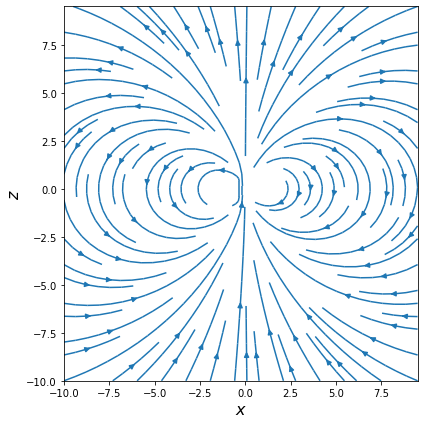

In [4]:
# Graficamos el valor del potencial y las curvas equipotenciales en el plano (x,z)
xv = np.arange(-10,10,.5)       # generamos un vector para x entre -10 y 10 con paso de 0.5
zv = np.arange(-10,10,.5)+1e-15 # generamos un vector para z entre -10 y 10 y lo desplazamos para evitar la singularidad
x, z = np.meshgrid(xv, zv)      # generamos una malla 2D con todos los valores de x y z en cada punto

# Calculamos las coordenadas esféricas en cada punto de la malla
r     = np.sqrt(x**2+z**2)
theta = np.arctan2(x,z)

# Graficamos el campo eléctrico en esféricas y lo proyectamos en cartesianas
Er = 2*p*np.cos(theta)/r**3
Et =   p*np.sin(theta)/r**3
Ex = Er*np.sin(theta) + Et*np.cos(theta)
Ez = Er*np.cos(theta) - Et*np.sin(theta)

plt.figure(figsize=(6,6))
plt.streamplot(x,z,Ex,Ez)
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$z$',fontsize=16)
plt.tight_layout()
plt.show()